In [54]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


beer = pd.read_csv('./lager_antioxidant_reg.csv')
beer.head()


,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


In [27]:
beer.describe()

,beer,tpc,ma,dsa,asa,orac,rp,mca
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000
mean,20.500000,168.228250,10.302000,0.608500,1.33500,3.570500,0.69050,29.711500
std,11.690452,41.744391,2.837392,0.171278,0.39813,2.435364,0.18439,22.204255
min,1.000000,84.640000,1.640000,0.240000,0.16000,0.010000,0.38000,5.360000
25%,10.750000,147.072500,9.200000,0.525000,1.15000,1.500000,0.59750,14.182500
50%,20.500000,163.110000,10.710000,0.605000,1.35500,3.290000,0.66000,21.560000
75%,30.250000,189.875000,12.417500,0.685000,1.54500,4.930000,0.73250,34.240000
max,40.000000,267.270000,14.830000,0.970000,2.23000,9.120000,1.30000,80.890000


In [28]:
x_columns = [col for col in beer.columns.values if (col not in  ["tpc", "beer"])]
beer_x = beer[x_columns]
beer_y = beer["tpc"]

In [56]:
beer_y.head()

0    148.23
1    160.38
2    170.41
3    208.65
4    146.03
Name: tpc, dtype: float64

In [57]:
# split train and test set (should we?)
X_train, X_test, y_train, y_test = train_test_split(beer_x, beer_y, test_size=0.2)
#create the model
beer_model = linear_model.LinearRegression()
beer_model.fit(X_train, y_train)
#now we print the model coefficients
beer_model.intercept_

24.791094633279215

In [58]:
beer_model.coef_

array([  1.75129231, 101.98843771,   1.2679563 ,  -0.94717173,
        75.07444263,   0.49100118])

In [59]:
#score returns the coefficient of determination or r squared. 
#This number tells us what proportion of the variation in the data is explained 
#by the model
beer_model.score(X_train, y_train)

0.8168936678413284

In [8]:
#model:
# tpc =  19.325084202176356 + 
#        1.29601176 * ma + 
#        121.0295907 * dsa + 
#        (-5.71119167) * asa + 
#        (-2.0842103) * orac + 
#        92.42515364 * rp + 
#        0.39715606 * mca


In [2]:
import yellowbrick.regressor
from yellowbrick.regressor import ResidualsPlot
# sorry, but this is really necessary...:
%matplotlib inline 

visualizer = ResidualsPlot(beer_model, hist=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # also show the test data

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
# large difference in R-squared between training and test set: why?



In [60]:
beer_model.predict(X_test)

array([147.74895569, 144.72633641, 136.94423974, 119.13986381,
       166.92126678, 151.94922375, 203.27476919, 149.55540319])

In [61]:
# we can also compute RMSE etc., we already saw that
MSE = mean_squared_error(y_test, beer_model.predict(X_test))
RMSE = math.sqrt(MSE)
RMSE

16.916390650185622

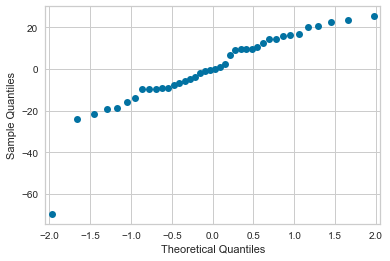

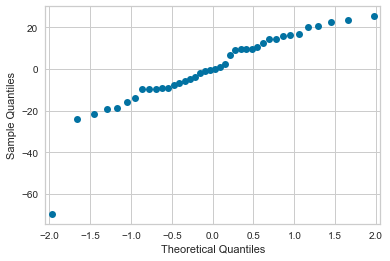

In [10]:
# import statsmodels.api as sm

# predictions = beer_model.predict(beer_x)
# residuals = beer_y - predictions
# sm.qqplot(residuals)
